# Imports and Data Loading

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

In [53]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Basic understanding of dataset

In [54]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [55]:
train_data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [56]:
train_data['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [57]:
train_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [58]:
train_data.info()
print('\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [59]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [60]:
train_data.select_dtypes(include=object).describe().transpose()

,count,unique,top,freq
keyword,7552,221,fatalities,45
location,5080,3341,USA,104
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10


# Missing values

In [61]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [62]:
test_data.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [63]:
train_data['location'] = train_data['location'].fillna('None')
test_data['location'] = test_data['location'].fillna('None')

In [64]:
train_data[train_data['keyword'].isnull()].iloc[25]['text']

"No way...I can't eat that shit"

In [65]:
train_data['keyword'] = train_data['keyword'].fillna('None')
test_data['keyword'] = test_data['keyword'].fillna('None')

In [66]:
train_data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [67]:
test_data.isnull().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

# Feature Extraction

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [69]:
X = train_data['text']
y = train_data['target']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=101)

In [72]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train)

TfidfVectorizer()

In [73]:
X_train_tfidf = tfidf.transform(X_train)
X_validation_tfidf = tfidf.transform(X_validation)

# Model Selection

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [75]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [76]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [78]:
def report(model):
    preds = model.predict(X_validation_tfidf)
    print(classification_report(y_validation,preds))
    ConfusionMatrixDisplay.from_predictions(y_validation,preds, cmap='Blues')

NB MODEL
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       442
           1       0.87      0.60      0.71       320

    accuracy                           0.79       762
   macro avg       0.81      0.77      0.78       762
weighted avg       0.81      0.79      0.79       762



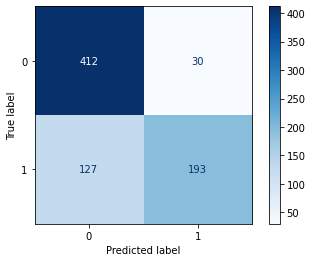

In [79]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       442
           1       0.80      0.70      0.75       320

    accuracy                           0.80       762
   macro avg       0.80      0.79      0.79       762
weighted avg       0.80      0.80      0.80       762



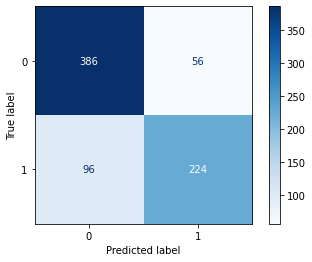

In [80]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       442
           1       0.74      0.72      0.73       320

    accuracy                           0.78       762
   macro avg       0.77      0.77      0.77       762
weighted avg       0.78      0.78      0.78       762



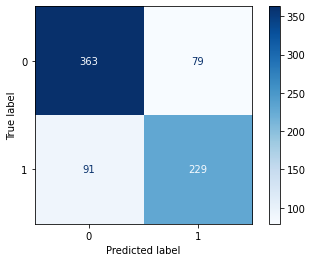

In [81]:
print('SVC')
report(svc)

# Final Model

In [82]:
tfidf = TfidfVectorizer()
tfidf.fit(X)

X_train_tfidf = tfidf.transform(X)
X_test_tfidf = tfidf.transform(test_data['text'])

In [83]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y)

LogisticRegression(max_iter=1000)

In [84]:
predictions = log.predict(X_test_tfidf)

In [85]:
output = pd.DataFrame({'id': test_data['id'], 'target': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
